# Από τους Νευρώνες στα <br/>Νευρωνικά Δίκτυα Β'

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Θα φτιάξουμε το πρώτο μας νευρωνικό δίκτυο, του ενός νευρώνα.

* Ξεκινάμε εισάγοντας τις βιβλιοθήκες που θα χρειαστούμε.

* Εμείς θα εργαστούμε με τη βιβλιοθήκη [TensorFlow](https://www.tensorflow.org/).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

import tensorflow as tf
from tensorflow import keras
from keras import optimizers

tf.random.set_seed(0) # for reproducibility, not in production

* Θα φτιάξουμε ένα τεχνητό σύνολο δεδομένων με δύο συστάδες.

In [2]:
data, labels = make_blobs(n_samples=500,
                          n_features=2,
                          centers=[(-2.5, -2.5), (2, 2)],
                          random_state=13)

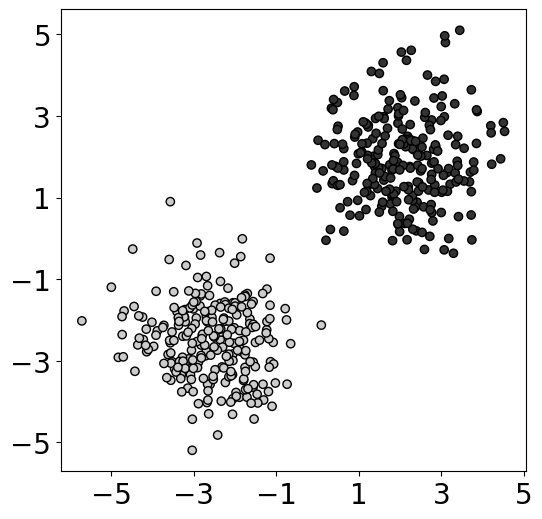

In [3]:
cm_data = ListedColormap(['0.8', '0.2'])

x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data,
           edgecolors='k')

plt.xticks(range(-5, 6, 2))
plt.yticks(range(-5, 6, 2))
plt.tick_params(labelsize=20)

* Όπως είπαμε, θα φτιάξουμε ένα νευρωνικό δίκτυο του ενός νευρώνα.

* Θα χρησιμοποιήσουμε τη *σιγμοειδή συνάρτηση* ως συνάρτηση ενεργοποίησης.

* Είναι σαν τη συνάρτηση βήματος, μόνο που είναι ομαλή. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$

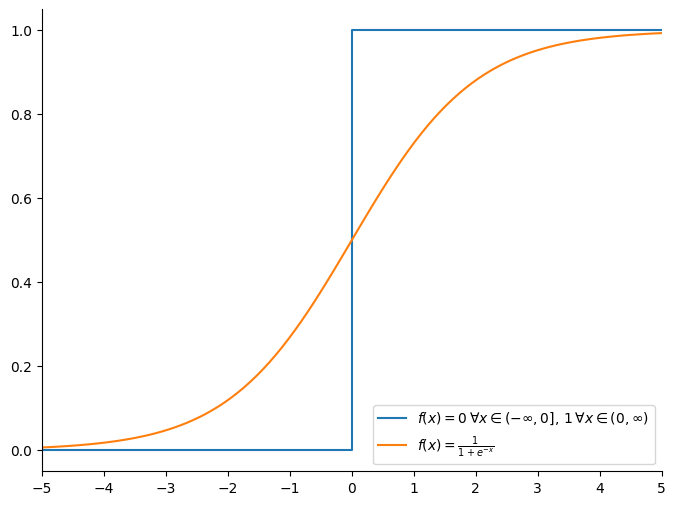

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
all_x = np.append(x, -x[::-1])
all_y = np.append(y, np.ones_like(-x[::-1]))
plt.plot(all_x, all_y, label= r"$f(x) = 0\, \forall x \in (-\infty, 0],\, 1\, \forall x \in (0, \infty)$")
all_s_y = 1 / (1 + np.exp(-all_x))
plt.plot(all_x, all_s_y, label=r"$f(x) = \frac{1}{1 + e^{-x}}$")
_ = plt.legend(loc='lower right')

* Ιδού πώς κατασκευάζουμε το τετριμμένο μας νευρωνικό δίκτυο.

* Ο νευρώνας με τη σιγμοειδή συνάρτηση ενεργοποίησης ονομάζεται *perceptron*.

In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

* Πρέπει να ορίσουμε με ποιον τρόπο θα μάθει ο νευρώνας τα βάρη και την πόλωση.

* Δηλαδή, πρέπει να ορίσουμε τον αλγόριθμο βελτιστοποίησης (optimizer).

* Θα χρησιμοποιήσουμε τη γνωστή μας Στοχαστική Κάθοδο Κλίσης (Stochastic Gradient Descent).

* Αυτή θα βρει τις τιμές των $w_1$, $w_2$, $b$ που ελαχιστοποιούν το λάθος, δηλαδή την *απώλεια* (loss).

In [6]:
sgd = optimizers.SGD()

* Στη συνέχεια πρέπει:

  1. Να συνδέσουμε τον βελτιστοποιητή με το δίκτυό μας.

  2. Να ορίσουμε την απώλεια που θα προσπαθήσει να ελαχιστοποιήσει ο αλγόριθμος βελτιστοποίησης.
  
  3. Να ορίσουμε πώς θα μετρήσουμε την επίδοση του νευρωνικού δικτύου.
  
  
* Αυτά τα κάνουμε με τη μέθοδο `compile()`.

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

* Αφού τα κάναμε αυτά, μπορούμε να εκπαιδεύσουμε το μοντέλο μας.

* Θα χρησιμοποιήσουμε (και πάλι) τη μέθοδο `fit()`.

* Ορίζουμε το μέγεθος της *φουρνιάς* (batch) των δειγμάτων που χρησιμοποιεί κάθε φορά ο αλγόριθμος για να υπολογίσει την απώλεια και να διορθώσει τα βάρη και την πόλωση. Η προεπιλεγμένη τιμή είναι 32.

* Επίσης δίνουμε τον αριθμό των *εποχών* (epochs) που θα εκπαιδεύσουμε το μοντέλο μας. Μια εποχή είναι ένα πλήρες πέρασμα από τα δεδομένα μας.

* Αν κάθε φουρνιά έχει μέγεθος 10, κάθε εποχή θα αποτελείται από $500/10 = 50$ φουρνιές.

In [8]:
model.fit(data, labels, batch_size=10, epochs=100) 

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0225 - loss: 0.7966
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0621 - loss: 0.6934
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2258 - loss: 0.5099
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5329 - loss: 0.2979
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - loss: 0.1618
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.0986
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - loss: 0.0685
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9408 - loss: 0.0521
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9576 - loss: 0.0419
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0350
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9778 - loss: 0.0300
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

* Για να οπτικοποιήσουμε τα αποτελέσματα θα προβλέψουμε τις τιμές για όλη την έκταση των $x$ και $y$. 

In [9]:
offset = 0.5

x_min, x_max = data[:, 0].min() - offset, data[:, 0].max() + offset
y_min, y_max = data[:, 1].min() - offset, data[:, 1].max() + offset

h = .05  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h),
                     np.arange(y_min, y_max+h, h))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])

1604/1604 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


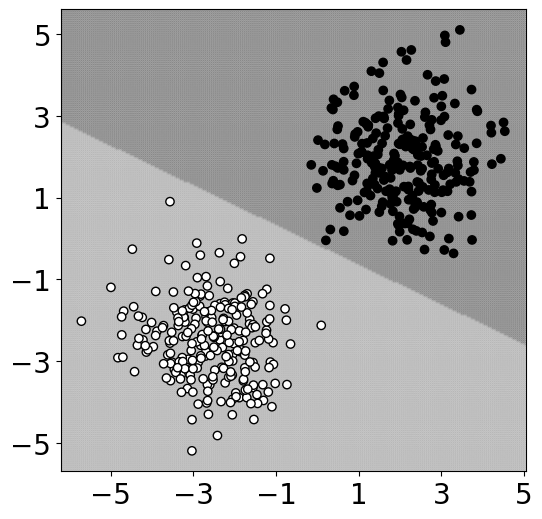

In [10]:
z = predictions.reshape(xx.shape)

cm_mesh = ListedColormap(['0.7', '0.5'])
cm_data_mesh = ListedColormap(['1.0', '0.0'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.pcolormesh(xx, yy, z,
              cmap=cm_mesh,
              shading='gouraud',
              alpha=0.4)

ax.scatter(data[:, 0], data[:, 1],
           c=labels,
           cmap=cm_data_mesh,
           linewidth=1,
           edgecolors='k')

plt.xticks(range(-5, 6, 2))
plt.yticks(range(-5, 6, 2))
plt.tick_params(labelsize=20)

* Μετά την εκπαίδευση, το νευρωνικό δίκτυο έχει μάθει τα βάρη και τις πολώσεις που αντιστοιχούν στα δεδομένα της εκπαίδευσης.

* Αυτές τις τιμές μπορούμε να τις εξάγουμε από το μοντέλο μας.

In [11]:
for layer in model.layers:
    weights, bias = layer.get_weights()
    print('weights: ', ' '.join([str(round(x[0], 2)) for x in weights]))
    print('bias: ', round(bias[0], 2))

weights:  0.7 1.45
bias:  0.22


* Τι βρήκαμε; Τι μάθαμε;

* Έναν νευρώνα που υπολογίζει τη συνάρτηση:

   $$ y = \sigma(x_1 w_1 + x_2 w_2 + b) $$
   
* Αυτόν τον βρήκαμε διορθώντας διαδοχικά τα βάρη και την πόλωση με βάση την απώλεια των προβλέψεων. (Και αυτό γίνεται με βάση παραγώγους.)   
   
* Το παραπάνω είναι ένας γραμμικός συνδυασμός.

* Γενικότερα, ένας perceptron μπορεί να λύσει το πρόβλημα της ταξινόμησης σε γραμμικώς διαχωρίσιμα δεδομένα.